In [190]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta

import matplotlib as mpl

In [191]:
StartingAmount = 500_000

import libaries

In [192]:
stock = "GOOGL"
start = (date.today()-timedelta(150))

end = date.today()

df = web.DataReader(stock,'yahoo',start,end)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-16,2767.250000,2705.979980,2750.500000,2766.189941,1119200,2766.189941
2021-08-17,2765.310059,2721.639893,2755.000000,2733.229980,1085800,2733.229980
2021-08-18,2742.090088,2706.429932,2730.000000,2708.979980,962900,2708.979980
2021-08-19,2727.050049,2685.000000,2688.709961,2713.600098,1089100,2713.600098
2021-08-20,2751.080078,2705.000000,2720.000000,2748.590088,1558600,2748.590088
...,...,...,...,...,...,...
2022-01-07,2768.969971,2715.330078,2762.909912,2740.340088,1487700,2740.340088
2022-01-10,2776.389893,2663.290039,2701.560059,2773.389893,2219000,2773.389893
2022-01-11,2804.320068,2733.850098,2760.139893,2794.719971,1436500,2794.719971


In [193]:
df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=10).mean()

df['Vol_Moving_Avg'] = df['Volume'].rolling(window=10).mean()



In [194]:
df = df[df['Price_Moving_Avg'].notna()]

df

,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg
Date,,,,,,,,
2021-08-27,2890.250000,2829.939941,2833.050049,2880.080078,1438600,2880.080078,2784.712036,1146320.0
2021-08-30,2919.409912,2883.260010,2888.000000,2891.810059,1221700,2891.810059,2797.274048,1156570.0
2021-08-31,2903.429932,2885.620117,2902.939941,2893.949951,1122400,2893.949951,2813.346045,1160230.0
2021-09-01,2925.080078,2897.669922,2900.000000,2904.310059,1096800,2904.310059,2832.879053,1173620.0
2021-09-02,2910.389893,2863.699951,2904.320068,2865.739990,1617100,2865.739990,2848.093042,1226420.0
...,...,...,...,...,...,...,...,...
2022-01-07,2768.969971,2715.330078,2762.909912,2740.340088,1487700,2740.340088,2868.463013,1322710.0
2022-01-10,2776.389893,2663.290039,2701.560059,2773.389893,2219000,2773.389893,2849.989014,1464730.0
2022-01-11,2804.320068,2733.850098,2760.139893,2794.719971,1436500,2794.719971,2836.087012,1517380.0


<AxesSubplot:label='5509adc4-e6f4-400a-b8a7-395c74703965'>

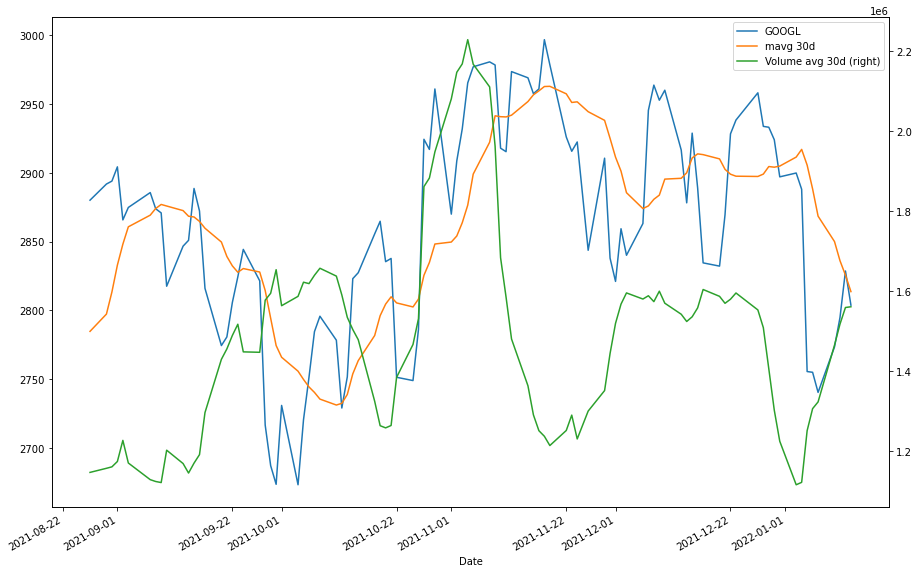

In [195]:
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]

mpl.rc('figure',figsize=(15,10))

#mpl.style.use('ggplot')

close_price.plot(label=stock,legend=True)
mavgplot.plot(label = 'mavg 30d',legend=True)
vmagplot.plot(secondary_y=True,label='Volume avg 30d',legend = True)

In [196]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

<ipython-input-196-e75b4b47397b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
<ipython-input-196-e75b4b47397b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])


,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg,Price Lower than MAVG,Volume Higher than MAVG
Date,,,,,,,,,,
2021-08-27,2890.250000,2829.939941,2833.050049,2880.080078,1438600,2880.080078,2784.712036,1146320.0,False,False
2021-08-30,2919.409912,2883.260010,2888.000000,2891.810059,1221700,2891.810059,2797.274048,1156570.0,False,False
2021-08-31,2903.429932,2885.620117,2902.939941,2893.949951,1122400,2893.949951,2813.346045,1160230.0,False,True
2021-09-01,2925.080078,2897.669922,2900.000000,2904.310059,1096800,2904.310059,2832.879053,1173620.0,False,True
2021-09-02,2910.389893,2863.699951,2904.320068,2865.739990,1617100,2865.739990,2848.093042,1226420.0,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2768.969971,2715.330078,2762.909912,2740.340088,1487700,2740.340088,2868.463013,1322710.0,True,False
2022-01-10,2776.389893,2663.290039,2701.560059,2773.389893,2219000,2773.389893,2849.989014,1464730.0,True,False
2022-01-11,2804.320068,2733.850098,2760.139893,2794.719971,1436500,2794.719971,2836.087012,1517380.0,True,True


In [197]:
z=1
PL=0.00

Start_Price = (df['Adj Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Adj Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)

benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 2880.080078125
End Price: 2803.774169921875
-13247.185170768227


In [198]:
for index,row in df.iterrows():
    if row['Volume Higher than MAVG']==1:
        if row['Price Lower than MAVG']==1:
            if z==1:
                print(index,row['Adj Close'], '- BUY')
                close_adj = row['Adj Close']
                PL =PL - close_adj
                z -=1
    else:
        if row['Volume Higher than MAVG']==0:
            if row['Price Lower than MAVG']==0:
                if z==0:
                    print(index,row['Adj Close'],'- SELL')
                    close_adj = row['Adj Close']
                    PL = PL + close_adj
                    Return = (PL/Start_Price)
                    Return_Per = "{:.2%}".format(Return)
                    print("Total Profit/Loss $",round(PL,2))
                    print("Total Return %",Return_Per,"\n")
                    z+=1

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
TotalReturn = Return * StartingAmount

print("The return for holding start to end was $", Hold_Return, " or ", Hold_Return_Per,".")
print("Return percentage" , Return*100,"%")
print("Return amount based of:",StartingAmount,"is:" ,TotalReturn)

2021-09-08 00:00:00 2873.820068359375 - BUY
2021-09-15 00:00:00 2888.590087890625 - SELL
Total Profit/Loss $ 14.77
Total Return % 0.51% 

2021-09-21 00:00:00 2780.659912109375 - BUY
2021-10-14 00:00:00 2823.02001953125 - SELL
Total Profit/Loss $ 57.13
Total Return % 1.98% 

2021-11-10 00:00:00 2917.8701171875 - BUY
2021-11-18 00:00:00 2996.77001953125 - SELL
Total Profit/Loss $ 136.03
Total Return % 4.72% 

2021-11-24 00:00:00 2922.39990234375 - BUY
2021-12-07 00:00:00 2945.389892578125 - SELL
Total Profit/Loss $ 159.02
Total Return % 5.52% 

2021-12-20 00:00:00 2832.139892578125 - BUY
The return for holding start to end was $ -76.305908203125  or  -2.65% .
Return percentage 5.521374934643338 %
Return amount based of: 500000 is: 27606.874673216687
